## Методические указания по выполнению лабораторной работы №5

**Тема: Обучение модели YOLO на кастомном датасете и исследование влияния гиперпараметров на качество детекции**

**Цель работы:** Познакомиться с архитектурой YOLO на примере проверки гипотезы о релевантной метрике.

**Задачи:**

- Ознакомиться с архитектурой YOLO.
- Изучить метрики для анализа производительности модели, выбрать целевую метрику в соответствии с вариантом.
- Выбрать предметную область, сформировать гипотезу для проведения исследования.
- Собрать и проаннотировать данные, сформировать датасет.
- Провести fine-tuning предобученной модели YOLOv11 Nano/Small.
- Визуализировать и проанализировать результаты.
- На основе анализа сделать корректировку гиперпараметров/данных и провести вторую итерацию для повышения показателей.

### 1. Подготовка к обучению

#### 1.1 Метрики

Вариант 1 - Precision

#### 1.2 Гипотеза

Гипотеза должна отражать характер уклона исследования с обоснованием, отталкиваясь от предметной области. *Одна лишь констатация необходимости достижения высокого значения целевой метрики не является обоснованием*.

#### 1.3 Данные

Соберите не менее 500 изображений из открытых источников. Можно пользоваться готовыми наборами данных, но важно проверить качество: разрешение изображений, качество аннотаций, баланс классов. При самостоятельном сборе данных можете воспользоваться терминальной утилитой ffmpeg для нарезки видео на кадры и любым удобным инструментом аннотирования (Roboflow, CVAT и тд). 

#### 1.4 Предобработка

Примените методы аугментации к данным для расширения объема датасета для получения 1.5-2к изображений. Подготовьте данные к требуемому формату для обучающего процесса.

### 2. Обучение модели

#### 2.1 Подготовка окружения

Установите зависимости и библиотеки:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from ultralytics import YOLO
import torch
from contextlib import redirect_stdout

#### 2.2 Подготовка модели

Загрузите предобученную модель, определите устройство, переведите модель в режим инференса. Не используйте размер модели больше чем Small для достижения лучших показателей на стандартных гиперпараметрах (особенно imgsz)

In [2]:
# импорт модели
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

model = YOLO("yolo11_I.pt", verbose=False).to(device)

Using device: cuda


In [3]:
import torch
print(torch.__version__)
print(torch.version.cuda)  # Проверка версии CUDA
print(torch.cuda.is_available())  # Проверка доступности GPU

2.6.0+cu126
12.6
True


#### 2.3 Загрузка и предобработка изображений


Затем импортируйте датасет в проект и выполните трансформацию данных (при использовании Roboflow трансформация выполняется на этапе предобработки):

In [4]:
# загрузка датасета
data_path = "C:/programming_HUB/MTUCI_projects/6_sem/neural_networks____university-homework/5_lab/dataset/dataset.yaml"
global_epochs = 10


#### 2.4 Обучение, оценка модели и визуализация результатов

Проведите обучение модели, проанализируйте кривые обучения, метрики и тестовые данные. Сделайте вывод и корректироваки для достижения лучших показателей

Ultralytics 8.3.134  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/programming_HUB/MTUCI_projects/6_sem/neural_networks____university-homework/5_lab/dataset/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11_I.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train52, nbs=64, nms=False, opset=None, optimize=False,

train: Scanning C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\5_lab\dataset\labels\train.cache... 355 images, 646 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 759.8183.9 MB/s, size: 87.5 KB)


val: Scanning C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\5_lab\dataset\labels\train.cache... 355 images, 646 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


Plotting labels to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train52\labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train52
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.19G      1.405     0.9592      1.291          9        640: 100%|██████████| 63/63 [00:14<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.23it/s]

                   all       1001        559       0.87      0.901      0.923      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.21G      1.446     0.9071      1.314          4        640: 100%|██████████| 63/63 [00:12<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.88it/s]

                   all       1001        559      0.896      0.868      0.939      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.23G        1.5     0.9121      1.359          6        640: 100%|██████████| 63/63 [00:11<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.57it/s]


                   all       1001        559     0.0773      0.224     0.0334     0.0175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.23G      1.416     0.8652      1.293          2        640: 100%|██████████| 63/63 [00:11<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.55it/s]

                   all       1001        559      0.875      0.841      0.933      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.23G      1.415     0.8477      1.269          8        640: 100%|██████████| 63/63 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.63it/s]

                   all       1001        559      0.945      0.919      0.966      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.23G      1.352     0.8032       1.24          4        640: 100%|██████████| 63/63 [00:11<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.00it/s]

                   all       1001        559      0.961      0.914      0.978      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.27G      1.336     0.7803      1.248          5        640: 100%|██████████| 63/63 [00:11<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.56it/s]

                   all       1001        559      0.937      0.928       0.98      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.28G      1.313     0.7486      1.215          6        640: 100%|██████████| 63/63 [00:12<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.21it/s]

                   all       1001        559      0.954      0.934       0.98      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.28G      1.297     0.7234      1.213          4        640: 100%|██████████| 63/63 [00:12<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all       1001        559      0.961      0.948      0.988      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.29G      1.244      0.691      1.174          4        640: 100%|██████████| 63/63 [00:12<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all       1001        559       0.96       0.95      0.986      0.649



10 epochs completed in 0.051 hours.
Optimizer stripped from C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train52\weights\last.pt, 5.4MB
Optimizer stripped from C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train52\weights\best.pt, 5.4MB

Validating C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train52\weights\best.pt...
Ultralytics 8.3.134  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]


                   all       1001        559      0.961       0.95      0.986      0.648
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train52
Ultralytics 8.3.134  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1111.6297.9 MB/s, size: 119.0 KB)


val: Scanning C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\5_lab\dataset\labels\train.cache... 355 images, 646 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.68it/s]


                   all       1001        559       0.96       0.95      0.985      0.647
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train522


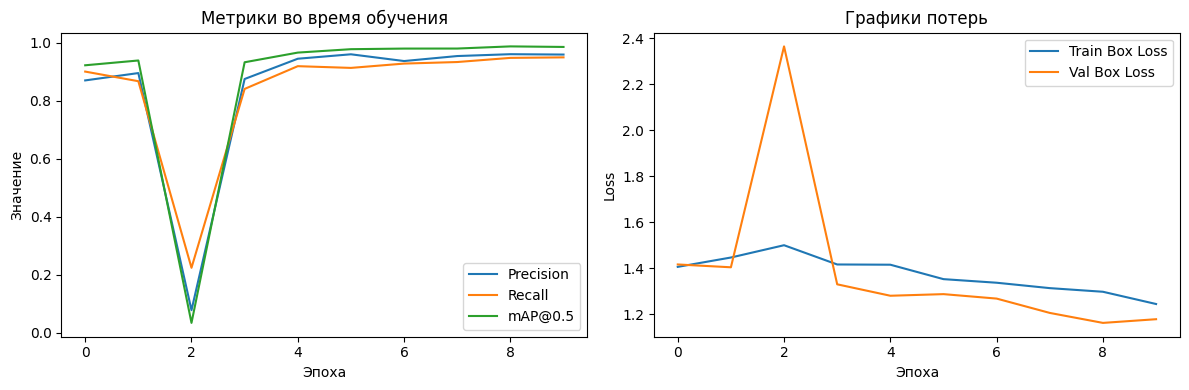

In [5]:
# обучение, оценка, визуализация
%matplotlib inline

params = {
    'data': data_path,
    'epochs': global_epochs,
    'imgsz': 640,
    'batch': 16,
    'device': device,
    'workers': 4,
    'optimizer': 'AdamW',
    'seed': 42
}
# Обучение модели

results = model.train(**params)

# Оценка модели на тестовых данных
metrics = model.val()
model.save('yolo11_I.pt')

# Визуализация результатов обучения

# Получаем историю обучения из CSV файла
# Путь к файлу с результатами
results_csv_path = os.path.join(model.trainer.save_dir, 'results.csv')

# Загружаем данные
try:
    results_df = pd.read_csv(results_csv_path)

    # Графики метрик
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(results_df['metrics/precision(B)'], label='Precision')
    plt.plot(results_df['metrics/recall(B)'], label='Recall')
    plt.plot(results_df['metrics/mAP50(B)'], label='mAP@0.5')
    plt.title('Метрики во время обучения')
    plt.xlabel('Эпоха')
    plt.ylabel('Значение')
    plt.legend()

    # Графики потерь
    plt.subplot(1, 2, 2)
    plt.plot(results_df['train/box_loss'], label='Train Box Loss')
    plt.plot(results_df['val/box_loss'], label='Val Box Loss')
    plt.title('Графики потерь')
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()

except FileNotFoundError:
    print("Файл с результатами не найден")

In [6]:
print(f"map: {metrics.box.map}")
plt.show()

map: 0.6474443376299227


In [7]:
torch.cuda.empty_cache()
del model
import gc
gc.collect()

52676

#### 2.5 Вторая итерация

Проведите процедуры для достижения высоких показателей (корректировка данных/гиперпараметров), сделайте вывод


In [8]:
%matplotlib inline
model = YOLO("yolo11_I.pt", verbose=False).to(device)

params_v2 = {
    'data': data_path,
    'epochs': global_epochs,
    'imgsz': 640,
    'batch': 16,
    'device': device,
    'workers': 4,
    'optimizer': 'AdamW',
    'seed': 42,

    'lr0': 0.001, # скорость обучения
    'lrf': 0.01, # финальная скорость обучения
    'weight_decay': 0.0005, # регуляризация. Заставляет оптимизатор уменьшат веса, чтобы уменьшить переобучение
}

# Повторное обучение модели с новыми параметрами
print("\nНачинаем вторую итерацию обучения с улучшенными параметрами")
results_v2 = model.train(**params_v2)

# Оценка новой модели
print("\nОценка улучшенной модели.")
metrics_v2 = model.val()

# Сохранение улучшенной модели
model.save('yolo11_II.pt')



Начинаем вторую итерацию обучения с улучшенными параметрами
Ultralytics 8.3.134  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/programming_HUB/MTUCI_projects/6_sem/neural_networks____university-homework/5_lab/dataset/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11_I.pt, momentum=0.937, mosaic=1.0, multi_scale=False

train: Scanning C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\5_lab\dataset\labels\train.cache... 355 images, 646 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 789.3233.9 MB/s, size: 87.5 KB)


val: Scanning C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\5_lab\dataset\labels\train.cache... 355 images, 646 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]


Plotting labels to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train53\labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train53
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.24G      1.291     0.8072       1.21          9        640: 100%|██████████| 63/63 [00:13<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all       1001        559      0.965      0.949      0.985      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.24G      1.209      0.664      1.153          4        640: 100%|██████████| 63/63 [00:13<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.30it/s]

                   all       1001        559      0.962      0.955      0.989      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.26G      1.268     0.6713      1.191          6        640: 100%|██████████| 63/63 [00:12<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.25it/s]

                   all       1001        559      0.962      0.946      0.989      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.27G      1.212     0.6535      1.149          2        640: 100%|██████████| 63/63 [00:12<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.51it/s]

                   all       1001        559      0.962      0.961       0.99      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.27G      1.203     0.6394      1.132          8        640: 100%|██████████| 63/63 [00:12<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.08it/s]

                   all       1001        559      0.962      0.955      0.989      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.27G      1.165     0.6166      1.122          4        640: 100%|██████████| 63/63 [00:12<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.98it/s]

                   all       1001        559      0.962       0.96      0.989      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.27G      1.152      0.602      1.133          5        640: 100%|██████████| 63/63 [00:13<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.41it/s]

                   all       1001        559      0.969       0.95      0.989      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.27G      1.162     0.5957      1.118          6        640: 100%|██████████| 63/63 [00:12<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all       1001        559      0.969      0.953       0.99      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.27G      1.158     0.6032      1.128          4        640: 100%|██████████| 63/63 [00:12<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.27it/s]

                   all       1001        559      0.974      0.957       0.99      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.27G      1.186     0.5991      1.136          4        640: 100%|██████████| 63/63 [00:12<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.73it/s]

                   all       1001        559      0.975      0.955      0.991      0.672



10 epochs completed in 0.052 hours.
Optimizer stripped from C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train53\weights\last.pt, 5.4MB
Optimizer stripped from C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train53\weights\best.pt, 5.4MB

Validating C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train53\weights\best.pt...
Ultralytics 8.3.134  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.40it/s]


                   all       1001        559      0.974      0.957       0.99      0.676
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train53

Оценка улучшенной модели.
Ultralytics 8.3.134  Python-3.12.4 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1159.1234.3 MB/s, size: 119.0 KB)


val: Scanning C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\5_lab\dataset\labels\train.cache... 355 images, 646 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:05<00:00, 10.95it/s]


                   all       1001        559      0.974      0.957       0.99      0.677
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to C:\programming_HUB\MTUCI_projects\6_sem\neural_networks____university-homework\runs\detect\train532



Метрики после второй итерации:
Precision: 0.9745 (было 0.9599). Разница 1.52%
Recall: 0.9569 (было 0.9499). Разница 0.74%
mAP@0.5: 0.9897 (было 0.9855). Разница 0.43%
mAP@0.5:0.95: 0.6772 (было 0.6474). Разница 4.60%


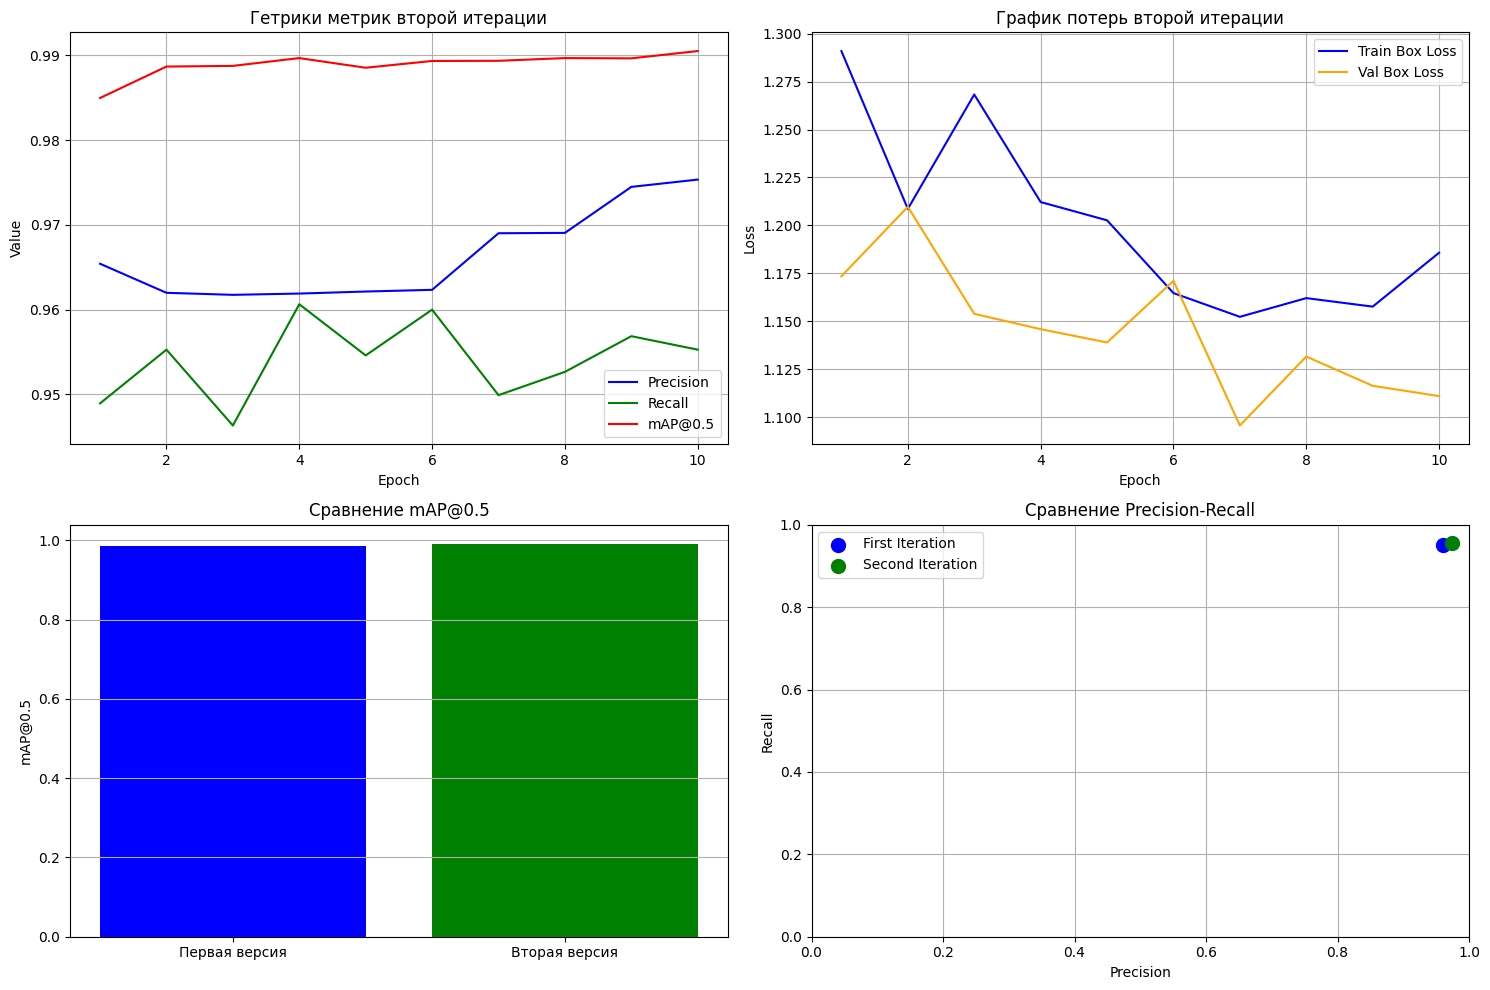


Улучшенная модель сохранена как 'yolov11n_improved.pt'


In [9]:
if 'metrics_v2' not in locals():
    import torch
    from ultralytics import YOLO
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    model = YOLO('yolo11_II.pt').to(device)
    metrics_v2 = model.val()

if 'metrics' not in locals():
    import torch
    from ultralytics import YOLO
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    model = YOLO('yolo11_I.pt').to(device)
    metrics = model.val()


def format_metric(metric):
    """Форматирует метрику, которая может быть numpy array или float"""
    if hasattr(metric, '__len__'):
        return f"{metric[0]:.4f}" if len(metric) > 0 else "N/A"
    return f"{metric:.4f}"

print("\nМетрики после второй итерации:")

print(f"Precision: {format_metric(metrics_v2.box.p)} (было {format_metric(metrics.box.p)}). Разница {(float(format_metric(metrics_v2.box.p))/float(format_metric(metrics.box.p)))*100-100:.2f}%")

print(f"Recall: {format_metric(metrics_v2.box.r)} (было {format_metric(metrics.box.r)}). Разница {(float(format_metric(metrics_v2.box.r))/float(format_metric(metrics.box.r)))*100-100:.2f}%")

print(f"mAP@0.5: {format_metric(metrics_v2.box.map50)} (было {format_metric(metrics.box.map50)}). Разница {(float(format_metric(metrics_v2.box.map50))/float(format_metric(metrics.box.map50)))*100-100:.2f}%")

print(f"mAP@0.5:0.95: {format_metric(metrics_v2.box.map)} (было {format_metric(metrics.box.map)}). Разница {(float(format_metric(metrics_v2.box.map))/float(format_metric(metrics.box.map)))*100-100:.2f}%")

# Визуализация результатов второй итерации
try:

    # Загрузка истории обучения
    results_csv_v2 = os.path.join(model.trainer.save_dir, 'results.csv')
    history_v2 = pd.read_csv(results_csv_v2)

    # Настройка графиков
    plt.figure(figsize=(15, 10))

    # График метрик
    plt.subplot(2, 2, 1)
    plt.plot(history_v2['epoch'], history_v2['metrics/precision(B)'], label='Precision', color='blue')
    plt.plot(history_v2['epoch'], history_v2['metrics/recall(B)'], label='Recall', color='green')
    plt.plot(history_v2['epoch'], history_v2['metrics/mAP50(B)'], label='mAP@0.5', color='red')
    plt.title('Гетрики метрик второй итерации')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()

    # График потерь
    plt.subplot(2, 2, 2)
    plt.plot(history_v2['epoch'], history_v2['train/box_loss'], label='Train Box Loss', color='blue')
    plt.plot(history_v2['epoch'], history_v2['val/box_loss'], label='Val Box Loss', color='orange')
    plt.title('График потерь второй итерации')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Сравнение mAP до и после
    plt.subplot(2, 2, 3)
    plt.bar(['Первая версия', 'Вторая версия'],
            [metrics.box.map50, metrics_v2.box.map50],
            color=['blue', 'green'])
    plt.title('Сравнение mAP@0.5')
    plt.ylabel('mAP@0.5')
    plt.grid(axis='y')

    # Сравнение Precision-Recall
    plt.subplot(2, 2, 4)
    plt.scatter(metrics.box.p, metrics.box.r, color='blue', s=100, label='First Iteration')
    plt.scatter(metrics_v2.box.p, metrics_v2.box.r, color='green', s=100, label='Second Iteration')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Сравнение Precision-Recall')
    plt.legend()
    plt.grid()
    plt.xlim(left=0)
    plt.xlim(right=1)
    plt.ylim(bottom=0)
    plt.ylim(top=1)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ошибка при визуализации результатов второй итерации: {e}")

print("\nУлучшенная модель сохранена как 'yolov11n_improved.pt'")